In [44]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import mglearn
import numpy as np
%matplotlib inline

In [51]:
iris = load_iris()


# irisデータから [0~99行, 2列目~]のデータを抽出
X = iris.data[:100, 2:]

# iris目的変数の0~99行を抽出 => 0, 1だけになる
Y = iris.target[:100]
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


#　ハードマージン

Text(0, 0.5, 'patal width')

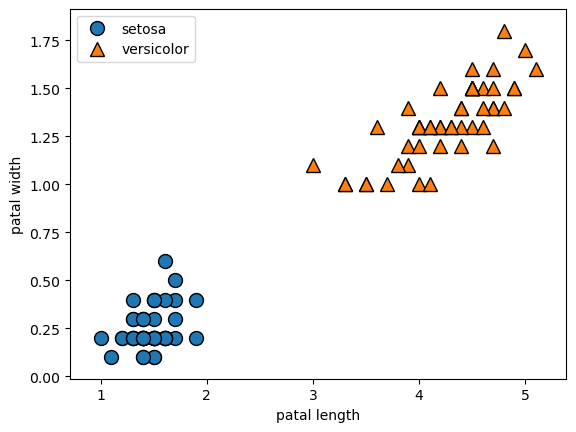

In [46]:
# petal lengthとpetal widthの分散
#　第3引数にsetosaとversicolorのlabel
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

# mglearnを使用することで書くデータにlabel付けする必要がない
plt.legend(['setosa', 'versicolor'], loc='best')
plt.xlabel('patal length')
plt.ylabel('patal width')

In [42]:
# stratify = Yにより、　X_train ~ Y_testの目的変数の比率をYと一致させる（層化）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC(dual=False)
svm.fit(X_train, Y_train)

LinearSVC(dual=False)

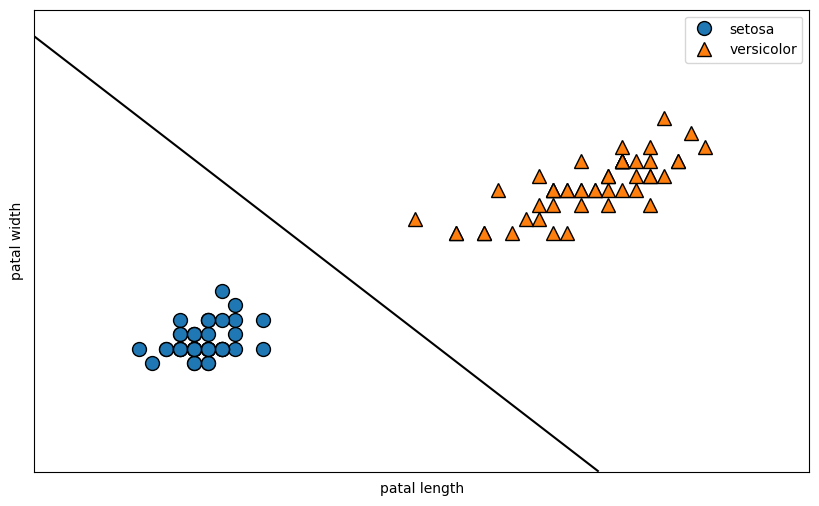

In [50]:
plt.figure(figsize=(10, 6))

#分離超平面
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel('patal length')
plt.ylabel('patal width')
plt.legend(['setosa', 'versicolor'], loc='best')


# ソフトマージン

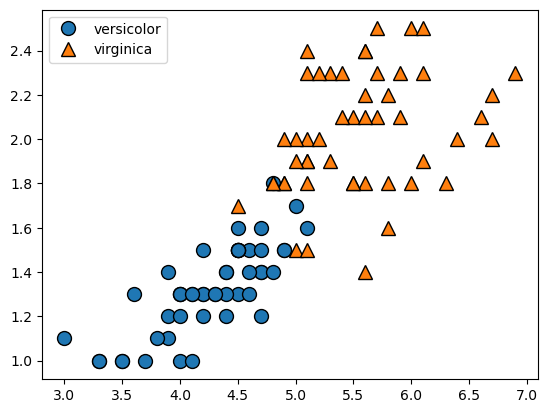

In [63]:
X = iris.data[50:, 2:]

# 1, 2のラベルを0, 1にする => 散布図には影響ないのになぜ？
Y = iris.target[50:] - 1

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['versicolor', 'virginica'], loc='best')

In [65]:
#svmの散布図用関数
def make_separate(model):
    mglearn.plots.plot_2d_separator(svm, X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(['setosa', 'versicolor'], loc='best')

0.96


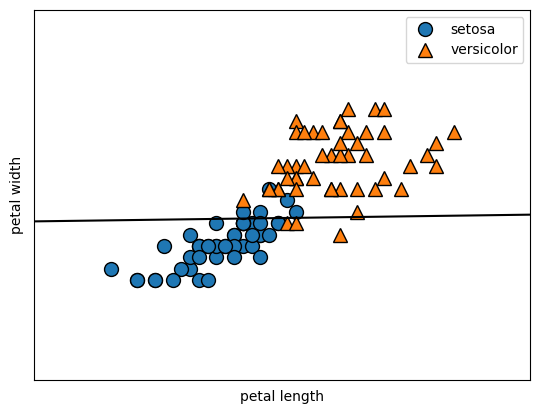

In [74]:
# C=0.1の時

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC(C=0.1, dual=False)
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

1.0


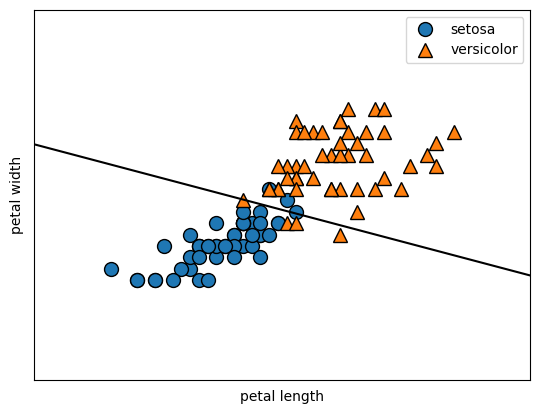

In [73]:
# C=1.0の時　：　デフォルト値

svm = LinearSVC(C=1.0, dual=False)
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

1.0


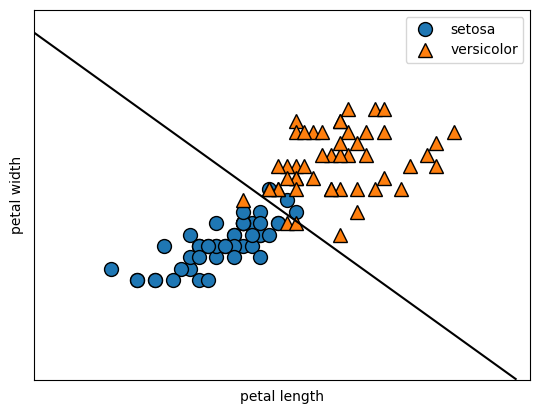

In [72]:
# C=100の時

svm = LinearSVC(C=100, dual=False)
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

# カーネル法　→　線形分離不可のデータ群を多次元データにして分離

In [76]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

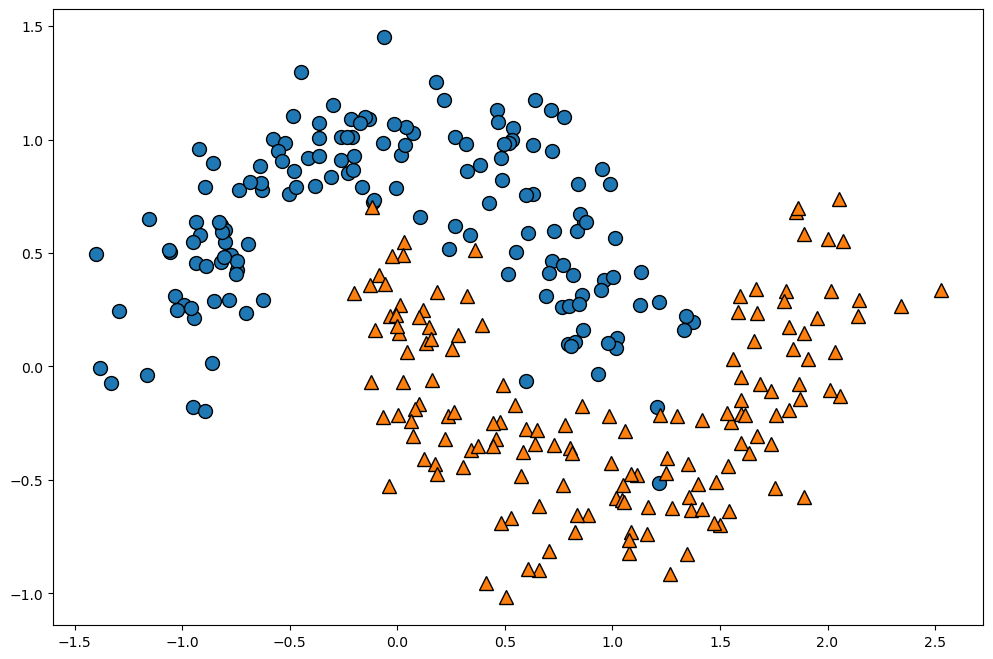

In [159]:
moons = make_moons(n_samples=300, noise=0.2, random_state=0)

X = moons[0]
Y = moons[1]
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

###　カーネル法実施しない方法

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)

# 多項式回帰へ変換（x**2まで）
poly = PolynomialFeatures(degree=2)

# x1 + x2 -> 1 + x1 + x2 + x1^2 + X1*X2 + x2^2に変換
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [109]:
print(poly.get_feature_names_out())
print(X_train_poly.shape)

['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
(225, 6)


In [110]:
#データの標準化
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)

In [123]:
lin_svm = LinearSVC(dual=False)
lin_svm.fit(X_train_poly_scaled, Y_train)
lin_svm.score(X_test_poly_scaled, Y_test)

0.84

In [128]:
#多項式回帰(X^3へ)

poly_scaler_svm = Pipeline([
    ('poly', PolynomialFeatures(3)),
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(dual=False))
])

poly_scaler_svm.fit(X_train, Y_train)
poly_scaler_svm.score(X_test, Y_test)

0.9733333333333334

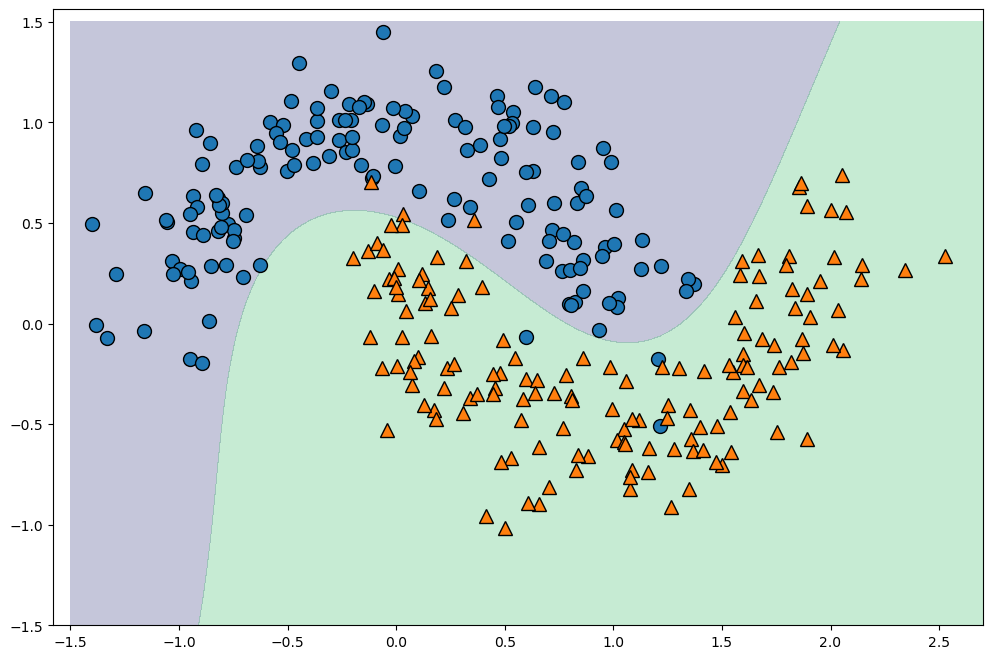

In [162]:
_x0 = np.linspace(-1.5, 2.7, 100)
_x1 = np.linspace(-1.5, 1.5, 100)

#各ベクトルの2次元座標を返す
x0, x1 = np.meshgrid(_x0, _x1)

#X0とX1を列ベクトルに変換し、[x0, x1]にする
X01 = np.hstack((x0.ravel().reshape(-1, 1), x1.ravel().reshape(-1, 1)))

#decision_function()は超平面のクラス分類モデルにおける各予想データの確信度を返す
y_decision = poly_scaler_svm.decision_function(X01).reshape(x0.shape)
plt.figure(figsize=(12, 8))
plt.contourf(x0, x1, y_decision, levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

###　カーネルを用いた実装

In [164]:
karnel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, coef0=1))
])

karnel_svm.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(coef0=1, kernel='poly'))])

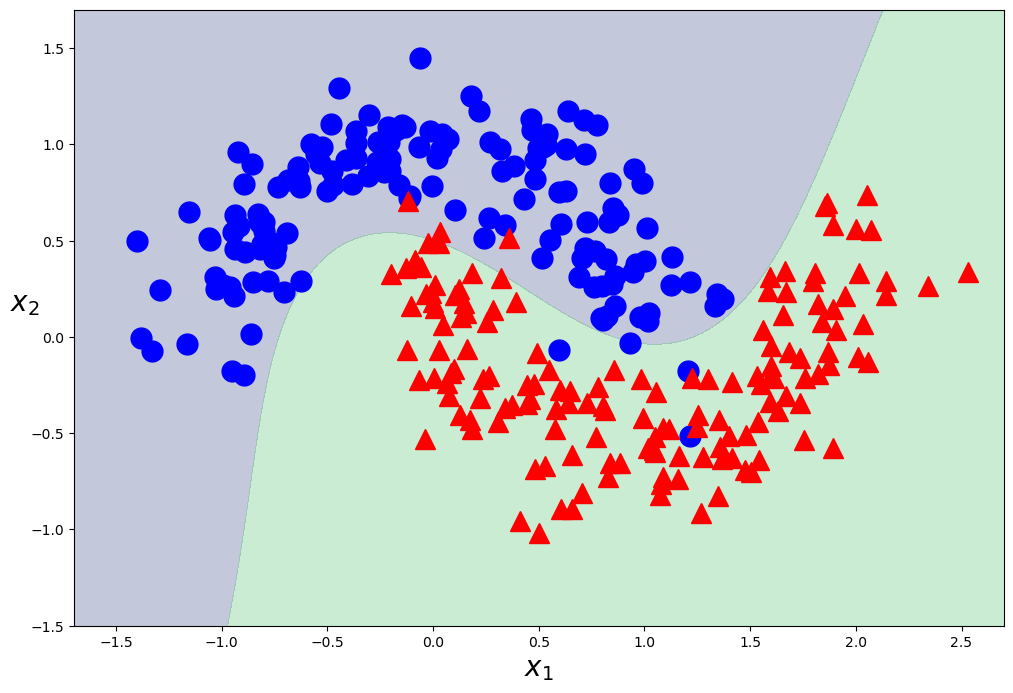

In [165]:
def plot_decision_function(model):
    _x0 = np.linspace(-1.7, 2.7, 100)
    _x1 = np.linspace(-1.5, 1.7, 100)
    x0, x1 = np.meshgrid(_x0, _x1)
    X = np.hstack((x0.ravel().reshape(-1, 1), x1.ravel().reshape(-1, 1)))
    y_decision = model.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_decision, levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)

def plot_dataset(x, y):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'bo', ms=15)
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'r^', ms=15)
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20, rotation=0)

plt.figure(figsize=(12, 8))
plot_decision_function(karnel_svm)
plot_dataset(X, Y)